In [2]:
# Import cell 
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import datetime
import country_converter as coco
import re
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv("data/Tweets.csv")
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

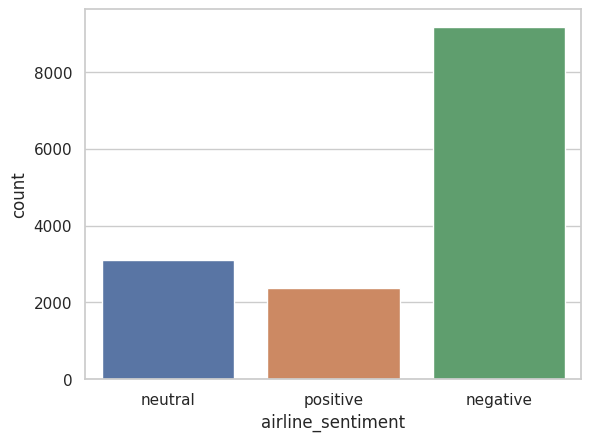

In [6]:
sns.countplot(data=df, x="airline_sentiment") 


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

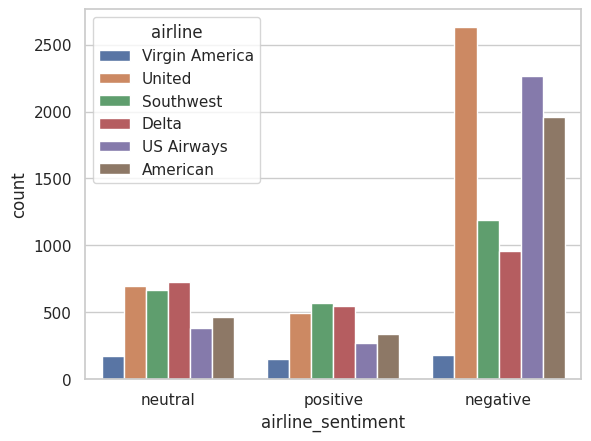

In [7]:
sns.countplot(data=df, x="airline_sentiment", hue= "airline") 

<AxesSubplot:xlabel='count', ylabel='airline'>

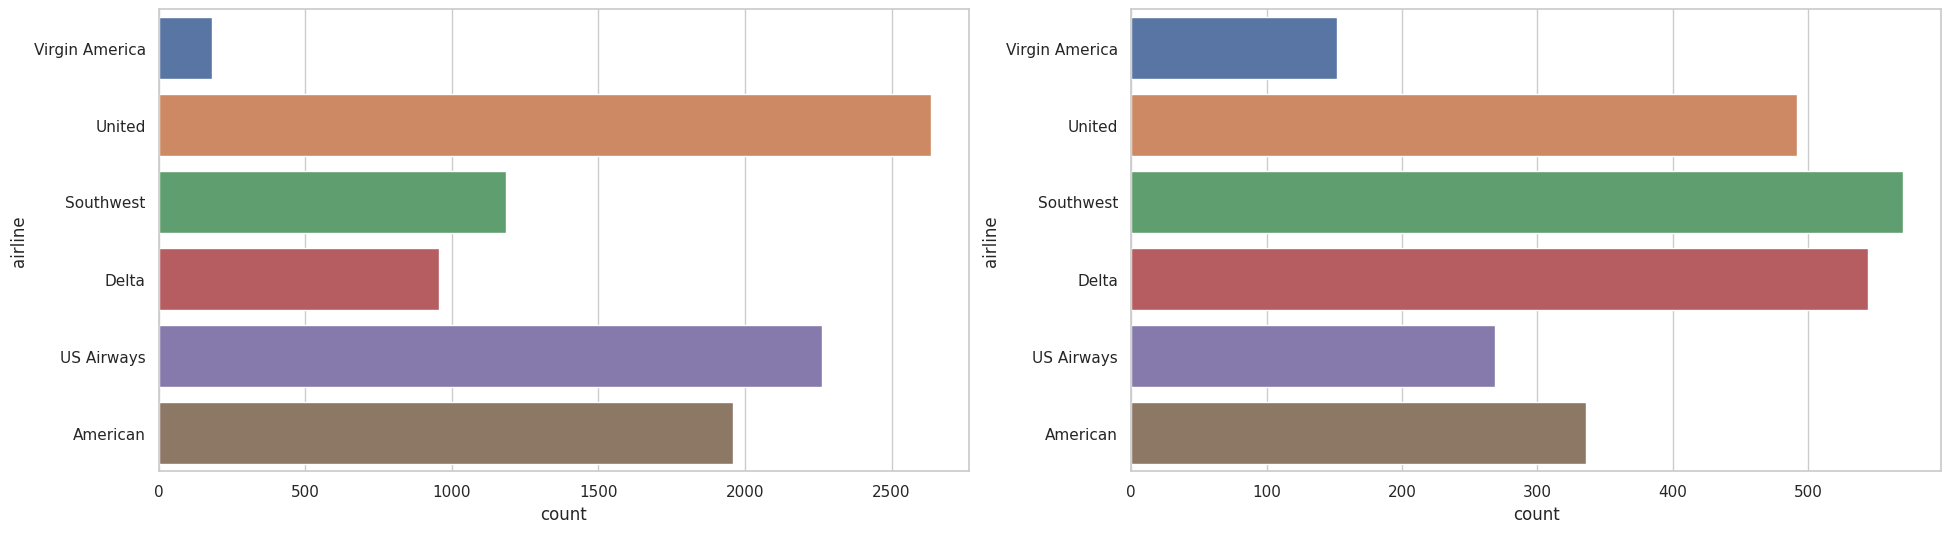

In [8]:
fig, axs = plt.subplots(1, 2, figsize = [23, 6])
negative = df[df["airline_sentiment"] == "negative"]
positive = df[df["airline_sentiment"] == "positive"]



sns.countplot(data= negative, y = "airline", ax= axs[0])
sns.countplot(data= positive, y = "airline", ax= axs[1])


<AxesSubplot:xlabel='len_text'>

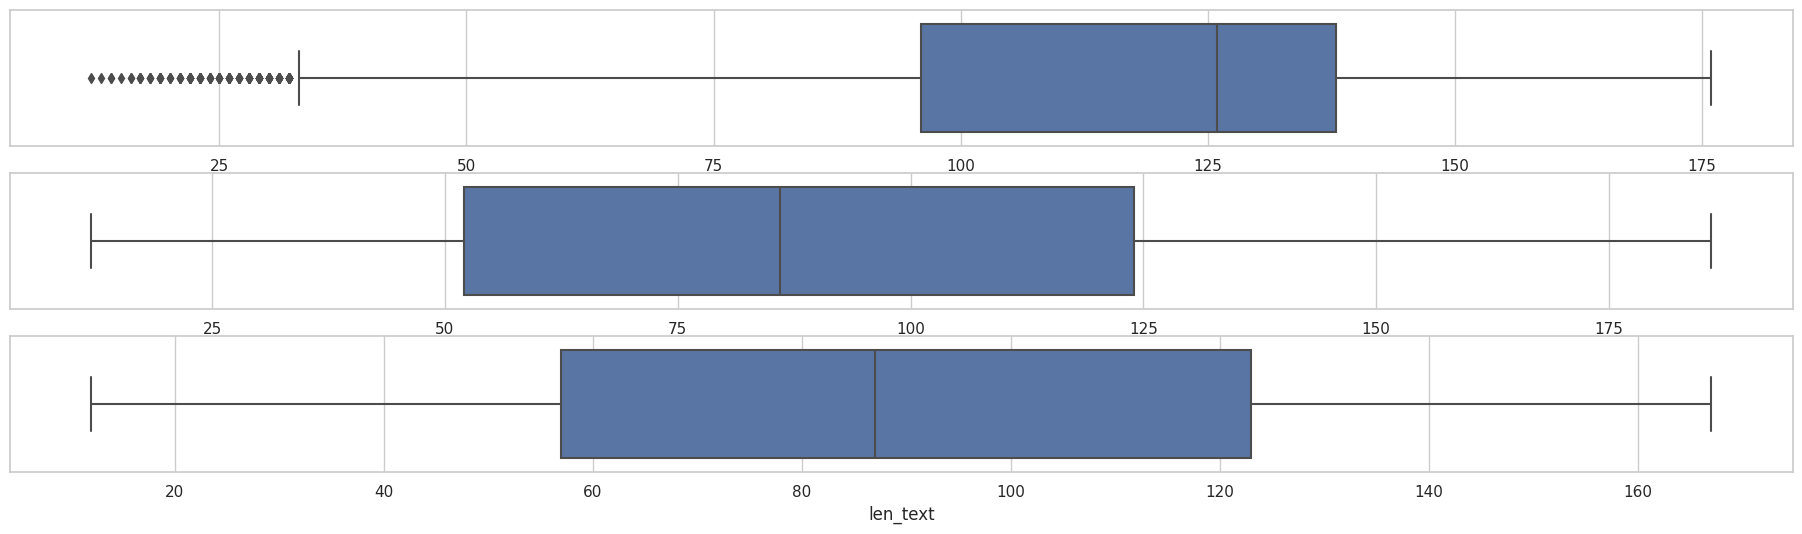

In [9]:
df["len_text"] = df["text"].apply(lambda x: len(x))
fig, axs = plt.subplots(3, 1, figsize = [23, 6])

negative = df[df["airline_sentiment"] == "negative"]
positive = df[df["airline_sentiment"] == "positive"]
neutral = df[df["airline_sentiment"] == "neutral"]


sns.boxplot(data = negative, x= "len_text", ax= axs[0])
sns.boxplot(data = positive, x = "len_text", ax= axs[1])
sns.boxplot(data = neutral, x = "len_text", ax= axs[2])


In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,len_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55


In [11]:
pattern = " -0800"
df["tweet_created"] = df["tweet_created"].apply(lambda x : str(x))\
                                         .apply(lambda x : re.sub(pattern, '', x ))\
                                         .apply(lambda x : int(round(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())))

unique_labels = df["airline_sentiment"].unique()
dictionary = {k:v for k,v in zip(unique_labels, range(len(unique_labels)))}
df["airline_sentiment"] = df["airline_sentiment"].apply(lambda x: dictionary[x])

df_corr = df[["airline_sentiment", "tweet_created"]]
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,airline_sentiment,tweet_created
airline_sentiment,1.000000,0.052684
tweet_created,0.052684,1.000000
